In [1]:
#import all libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

In [2]:
import os
print(os.listdir("../input"))

['train.csv']


# Collect and read Data

In [3]:
#read input dataset 
tit_ds = pd.read_csv('../input/train.csv')


In [4]:
#view first few data from the dataframe

tit_ds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##in the dataset Survived column is the out put that needs to be predicted 
#survival rates:
0-- not survived
1-- survived

In [5]:
print(tit_ds['Survived'].value_counts(normalize=True)*100)

0    61.616162
1    38.383838
Name: Survived, dtype: float64


# Analyze few input columns to see if they are helpful for predicting the output column Survived

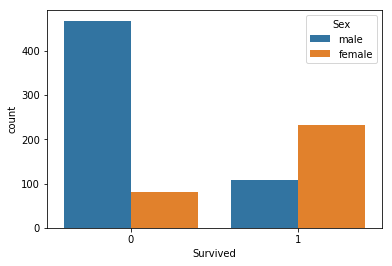

In [6]:
sns.countplot(x='Survived', hue='Sex',data=tit_ds) 

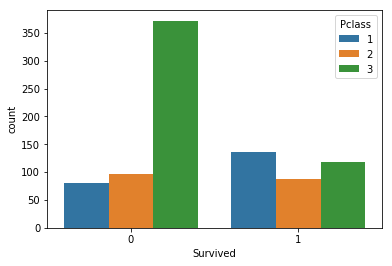

In [7]:
sns.countplot(x='Survived', hue='Pclass',data=tit_ds) 

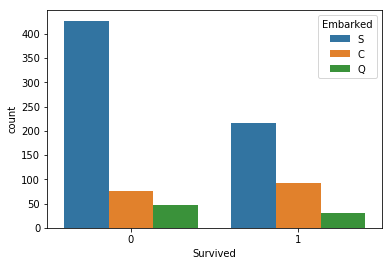

In [8]:
sns.countplot(x='Survived', hue='Embarked',data=tit_ds) 

# Data Cleansing 

In [9]:
tit_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
replace_columns_NaN=['Age'];

for column in replace_columns_NaN:
    mean=tit_ds[column].mean(skipna=True)
    tit_ds[column]=tit_ds[column].replace(np.NaN,mean)

In [11]:
tit_ds.drop('Cabin', axis=1,inplace=True)

In [12]:
tit_ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
sex_mapping = {"male": 1, "female": 2}
tit_ds['Sex']=tit_ds['Sex'].map(sex_mapping)

In [14]:
embark_mapping = {"S": 1, "C": 2, "Q":3}
tit_ds['Embarked']=tit_ds['Embarked'].map(embark_mapping)



In [15]:


tit_ds['Embarked']=tit_ds['Embarked'].replace(np.NaN,1)

In [16]:
tit_ds.head(10)

tit_ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
tit_ds.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [18]:
tit_ds.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1.0
1,1,1,2,38.000000,1,0,71.2833,2.0
2,1,3,2,26.000000,0,0,7.9250,1.0
3,1,1,2,35.000000,1,0,53.1000,1.0
4,0,3,1,35.000000,0,0,8.0500,1.0
5,0,3,1,29.699118,0,0,8.4583,3.0
6,0,1,1,54.000000,0,0,51.8625,1.0
7,0,3,1,2.000000,3,1,21.0750,1.0
8,1,3,2,27.000000,0,2,11.1333,1.0
9,1,2,2,14.000000,1,0,30.0708,2.0


# Train and Test Dataset

In [19]:
x=tit_ds.drop(['Survived'], axis=1)
y=tit_ds['Survived']
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=0)

In [20]:
#Normalize train and test inputsx=tit_ds.drop(['Survived'], axis=1)
y=tit_ds['Survived']
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=0)

In [21]:
normalize_tit_ds=StandardScaler()
X_train=normalize_tit_ds.fit_transform(X_train)
X_test=normalize_tit_ds.fit_transform(X_test)


In [22]:
DataModel=LogisticRegression()


In [23]:
DataModel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
PredictModel=DataModel.predict(X_test)

In [25]:
AccuracyModel = print(accuracy_score(PredictModel, y_test)*100)

82.08955223880598


In [26]:
confusion_matrix(y_test,PredictModel)

array([[145,  23],
       [ 25,  75]])